# Start

Creating the dataframe from the mnist dataset

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import cv2

In [2]:
images=[cv2.imread(file) for file in glob('mnist/train/*.png')]

In [ ]:
i=0
images=[]
for file in glob('mnist/train/*.png'):
    temp=cv2.imread(file)
    i++
    print(".")
    images.append(temp)
    

In [3]:
images=np.array(images)
images.shape

(60000, 28, 28, 3)

In [4]:
image=[]
for i in range(0,60000):
    img=images[i].flatten()
    image.append(img)
image=np.array(image)

In [5]:
train=pd.read_csv("mnist/train.csv")
feat_cols=['pixel'+str(i) for i in range(image.shape[1])]
df=pd.DataFrame(image,columns=feat_cols)
df['label']=train['label']

In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
28*28*3

2352

In [19]:
df[feat_cols].values.shape

(60000, 2352)

# FACTOR ANALYSIS

In the Factor Analysis technique, variables are grouped by their correlations

In [8]:
from sklearn.decomposition import FactorAnalysis
FA=FactorAnalysis(n_components=3).fit_transform(df[feat_cols].values)

In [9]:
FA

array([[-0.48965534,  1.85721199,  2.30136123],
       [-1.01144125,  0.32288212,  0.20309891],
       [-0.35268814,  1.64313182,  0.12972051],
       ...,
       [-1.46417883, -0.70893489, -0.96467896],
       [ 0.93358044, -0.61271086,  1.48621208],
       [-0.02421923, -1.14117681, -0.7505531 ]])

In [10]:
FA.size

180000

In [11]:
FA.shape

(60000, 3)

In [15]:
FA[:,0]

array([-0.48965534, -1.01144125, -0.35268814, ..., -1.46417883,
        0.93358044, -0.02421923])

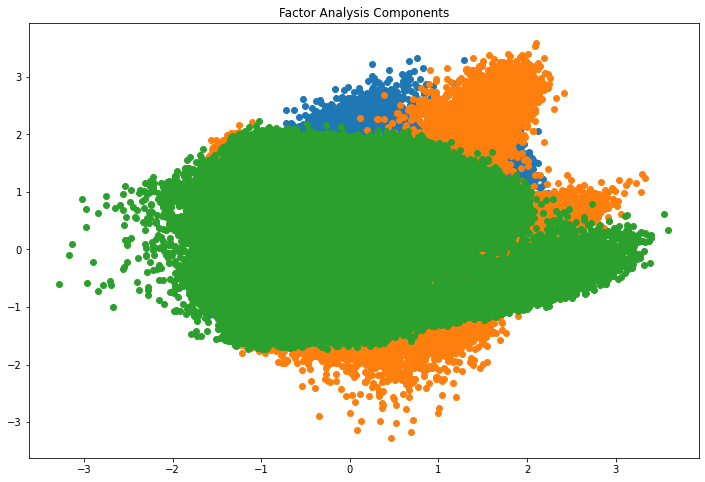

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0],FA[:,1])
plt.scatter(FA[:,1],FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

In this graph the entire dataset is split into 3 components based on their correlations.
We can see the different factors in the graph

# Principal component analysis

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_result=pca.fit_transform(df[feat_cols].values)


- A principal component is a linear combination of the original variables
- Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset
- Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component
- Third principal component tries to explain the variance which is not explained by the first two principal components and so on


In [22]:
pca_result

array([[ -214.26450038,  2827.54817816, -2095.62486907,   419.75420991],
       [-1638.23861011,   719.45939357,  -116.34143839,  2418.1661179 ],
       [ -230.12151974,  2495.39022837,  -161.74449793,  -516.91163988],
       ...,
       [-3070.84546744,  -671.14442731,   891.29656099,   346.64056183],
       [ 2001.89681965, -1171.84608168, -1410.63295042,  -113.69703795],
       [ -424.46282254, -1637.19855168,   655.09541331,   752.16460682]])

In [23]:
pca_result.shape

(60000, 4)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

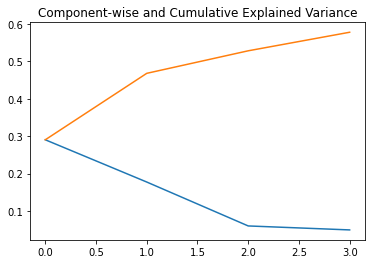

In [21]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

# Isomap reduction

For an n-dimensional curve, small flat pieces are manifolds and a combination of these manifolds will give us the original n-dimensional curve.

- We first look for a manifold that is close to the data
- Then project the data onto that manifold
- Finally for representation, we unfold the manifold

In [24]:
from sklearn import manifold
trans_data=manifold.Isomap(n_neighbors=5,n_components=3,n_jobs=1).fit_transform(df[feat_cols][:6000].values)


- n_neighbors decides the number of neighbors for each point
- n_components decides the number of coordinates for manifold
- n_jobs = -1 will use all the CPU cores available


In [26]:
trans_data

array([[14681.75760728,  -763.86196188,  9497.86352692],
       [ 6992.01988959,    32.68962803,  1853.99245679],
       [ 1931.3349855 , 12694.47320334,  -560.21796691],
       ...,
       [-3603.80498676,  3659.24925446, -2515.82814436],
       [-8236.48773212, -6402.19951497,  -241.66123798],
       [-8362.09343866, -4599.83546909,  4715.15794573]])

In [27]:
trans_data.shape

(6000, 3)

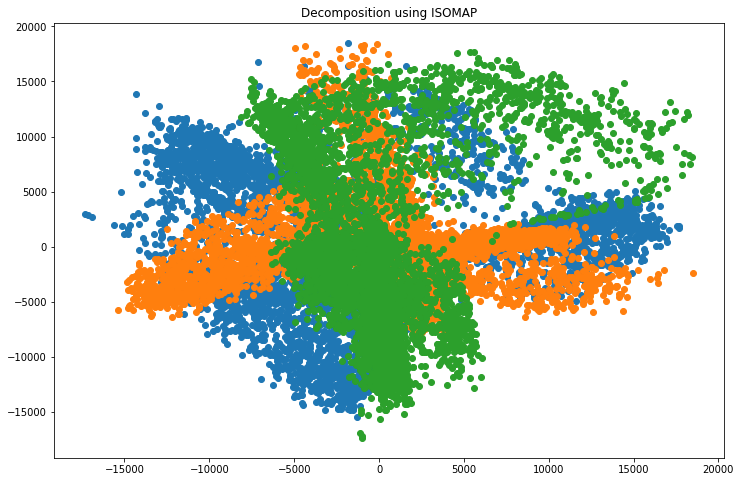

In [25]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1])
plt.scatter(trans_data[:,1], trans_data[:,2])
plt.scatter(trans_data[:,2], trans_data[:,0])

# t- Distributed Stochastic Neighbor Embedding

In [28]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=3,n_iter=300).fit_transform(df[feat_cols][:6000].values)

c:\users\l\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\l\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [29]:
tsne

array([[ 3.5076807 , -1.4569597 , -6.7076073 ],
       [ 2.7211652 , -2.9361334 , -1.7209226 ],
       [ 0.9388166 ,  5.9515915 , -0.2922681 ],
       ...,
       [ 0.02218845,  5.987797  ,  2.6048858 ],
       [-5.7414017 , -5.074116  ,  0.26330212],
       [-6.349575  ,  2.0349793 ,  3.926318  ]], dtype=float32)

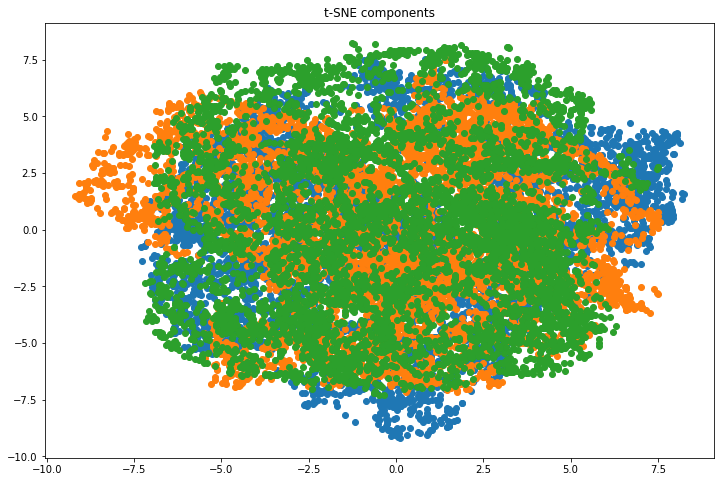

In [30]:
plt.figure(figsize=(12,8))
plt.title("t-SNE components")
plt.scatter(tsne[:,0],tsne[:,1])
plt.scatter(tsne[:,1],tsne[:,2])
plt.scatter(tsne[:,2],tsne[:,0])